#  Dataset Selection

I chose a dataset from Kaggle that contains clinical information related to heart attack events. It consists of 1,319 rows and 9 columns. Each row represents a patient, and the features include age, blood pressure, glucose, troponin, and more. The target variable `class` indicates whether the patient experienced a heart attack ("Yes" or "No").

This health-focused dataset is meaningful because early detection of heart attacks can save lives. Machine learning can assist doctors in identifying high-risk patients using routine medical tests.


# Framing the Business Problem

The goal is to predict whether a patient had a heart attack based on medical test results. This is a (binary classification) problem, where the target variable is "class" (Yes/No).

I chose the (F1-score) as the evaluation metric. This is because in medical predictions, both false positives (unnecessary alarm) and false negatives (missed diagnosis) are serious. The F1-score balances precision and recall, making it suitable for this task.


# Data Understanding

Here I load the dataset and inspect its shape, column names, data types, and missing values. This helps me understand what kind of data I am dealing with.

- Shape: 1319 rows × 9 columns
- No missing values are present
- Most features are numeric; the target is categorical ("Yes"/"No")

This initial step is important to detect issues early (like missing or wrongly typed data).


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [2]:
df=pd.read_csv('Heart Attack.csv')

In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
df.shape

(1319, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [9]:
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

# Train-Validation-Test Split

In [10]:
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
df['class'].value_counts()

class
1    810
0    509
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Variable Distribution')

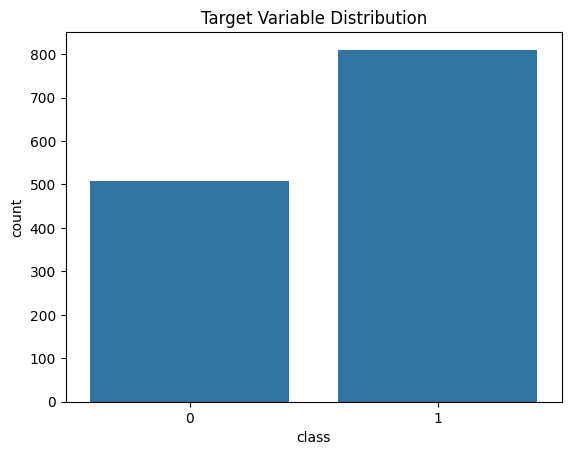

In [12]:
# Distribution of target
sns.countplot(data=df, x='class')
plt.title("Target Variable Distribution")

<Axes: xlabel='age', ylabel='Count'>

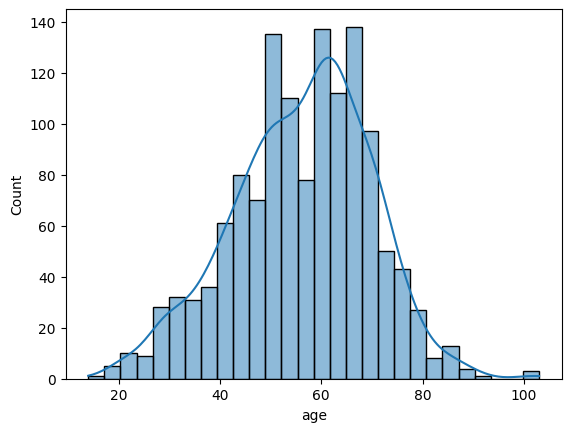

In [13]:
# Age distribution
sns.histplot(df['age'], kde=True)

In [14]:
df.corr(numeric_only=True)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
class,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


<Axes: >

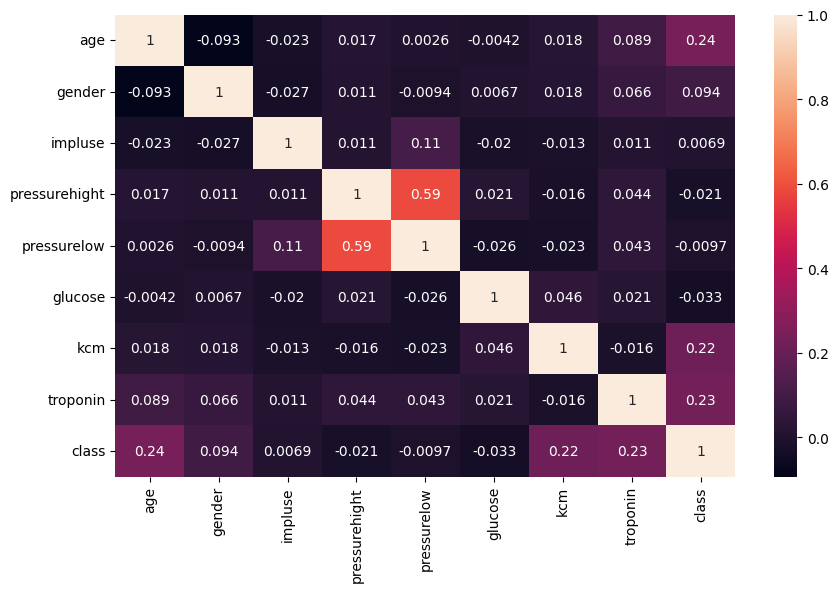

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [16]:
# Encode target 
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

In [17]:
df['class'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
#Feature Engineering
#Create blood pressure difference:
df['bp_diff'] = df['pressurehight'] - df['pressurelow']

In [19]:
df['bp_diff']

0       77
1       52
2       83
3       65
4       47
        ..
1314    55
1315    70
1316    64
1317    49
1318    78
Name: bp_diff, Length: 1319, dtype: int64

In [20]:
#Prepare Data for ML
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train 5 Different ML Models

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    score = f1_score(y_val, preds,average='binary')
    print(f"{name}: F1 Score = {score:.4f}")

Logistic Regression: F1 Score = 0.7983
Decision Tree: F1 Score = 0.9746
Random Forest: F1 Score = 0.9702
Gradient Boosting: F1 Score = 0.9746
SVM: F1 Score = 0.7479


In [22]:
#Choose Best Model + Tune It
params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
f1 = make_scorer(f1_score, average='binary')

grid = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring=f1)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
val_preds = best_model.predict(X_val_scaled)

score = f1_score(y_val, val_preds, average='binary')
print(f"Tuned Model F1 Score: {score:.4f}")

Tuned Model F1 Score: 0.9744


Final Model Evaluation

# Final Model Evaluation

In [24]:
#Final Model Evaluation

In [25]:
test_preds = best_model.predict(X_test_scaled)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.99      0.99      0.99       124

    accuracy                           0.99       198
   macro avg       0.99      0.99      0.99       198
weighted avg       0.99      0.99      0.99       198

